# Find best parameters describing data, both combined and separated fits. 
# Then run simulations on the cluster


Since most of the fits are chaotic, I repeat simulations multiple times (20).


In [66]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats
import pandas as pd
import functions_optimal as fun
import functions_dynamics as fun_dyna
from scipy.interpolate import interp1d,interp2d

area=4.0;linethicknes=1.0;

font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42
area=4.0;linethicknes=1.0;



Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
# Train DNN 

In [68]:
folder='/Users/ale/Dropbox/research/Laser_on_E_cells/Draft_figures_simulations_v2/fit_and_save_DNN/with_different_CV_K/simulations/'
results=np.loadtxt(folder+'results.txt');
folder='/Users/ale/Dropbox/research/Laser_on_E_cells/Draft_figures_simulations_v2/fit_and_save_DNN/with_different_CV_K_larger_J_long/simulations/'
results=np.concatenate((results,np.loadtxt(folder+'results.txt')));
folder='/Users/ale/Dropbox/research/Laser_on_E_cells/Draft_figures_simulations_v2/fit_and_save_DNN/with_different_CV_K_larger_J_long_2/simulations/'
results=np.concatenate((results,np.loadtxt(folder+'results.txt')));
folder='/Users/ale/Dropbox/research/Laser_on_E_cells/Draft_figures_simulations_v2/fit_and_save_DNN/with_different_CV_K_larger_J_long_3/simulations/'
results=np.concatenate((results,np.loadtxt(folder+'results.txt')));

sim_param_all=results[:,0:15]
moments_of_r_sim_all=results[:,15:20]

sim_g_E=(sim_param_all[:,2])
sim_g_I=(sim_param_all[:,3])
sim_beta=(sim_param_all[:,4])
sim_CV_K=(sim_param_all[:,7])
sim_sigma_Lambda_over_Lambda=(sim_param_all[:,10])
sim_J=(sim_param_all[:,11])
sim_r_X=(sim_param_all[:,12])
sim_ell=(sim_param_all[:,13])

print(np.shape(results))
#(121278, 28)


param_min=np.asarray([np.min(sim_g_E),np.min(sim_g_I),np.min(np.log10(sim_beta)),
                      np.min(np.log10(sim_CV_K)),np.min(np.log10(sim_sigma_Lambda_over_Lambda)),np.min(np.log10(sim_J)),])
param_max=np.asarray([np.max(sim_g_E),np.max(sim_g_I),np.max(np.log10(sim_beta)),
                      np.max(np.log10(sim_CV_K)),np.max(np.log10(sim_sigma_Lambda_over_Lambda)),np.max(np.log10(sim_J)),])
    


(770195, 28)


In [69]:
print(param_min)
print(param_max)

[ 3.    2.   -1.   -3.52 -1.   -5.  ]
[10.    9.49  1.   -0.52  1.   -2.3 ]


In [70]:
# Load recordings in mice and monkeys

In [71]:
data_mice=np.loadtxt('Mice_with_trials.txt');
data_monkeys=np.loadtxt('Monkeys_with_trials.txt');

data_both_species=[data_mice,data_monkeys]
# structure of data set is:
# unit number, contrast, laser, rate, other stuff

dataset_both_species,Con_both_species,nCon_both_species,normalization_both_species=[],[],[],[]
for idx_species in range(2):
    dataset,Con,nCon=fun.build_dataset(data_both_species[idx_species])
    normalization=1.0;#np.mean(dataset[0,:,0])
    dataset_both_species=dataset_both_species+[dataset]
    Con_both_species=Con_both_species+[Con]
    nCon_both_species=nCon_both_species+[nCon]
    normalization_both_species=normalization_both_species+[normalization]


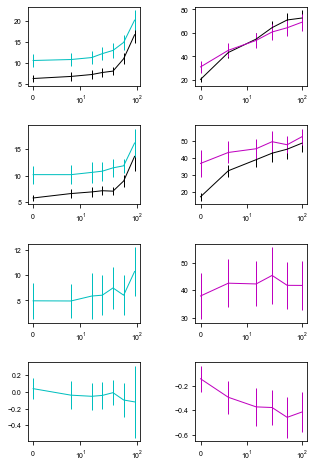

In [72]:

rows=4
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()



for idx_species in range(2):
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]

    for idx_moment in range(6):
        if idx_moment<2:
            idx_row=0
            ccc=['k',colors[idx_species]][idx_moment]
            
        if (idx_moment>=2)&(idx_moment<4):
            idx_row=1
            ccc=['k',colors[idx_species]][idx_moment-2]

        if (idx_moment==4):
            idx_row=2
            ccc=colors[idx_species]

        if (idx_moment==5):
            idx_row=3
            ccc=colors[idx_species]
            
        axs[2*idx_row+idx_species].errorbar(Con,dataset[idx_moment,:,0],dataset[idx_moment,:,1],
                                                 color=ccc,)

        axs[2*idx_row+idx_species].set_xscale('symlog', linthreshx=12)




In [73]:
# Train DNN
Predictor_sim,Predictor_data=fun.build_function()

# Best fit in separated

In [74]:
nRep=101;
ALL_sol,ALL_cost=[],[]
for idx_species in range(2):
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]
    sol,cost=fun.fit_model_to_data(dataset,Predictor_data,nCon,nRep,param_min,param_max)
    
    ALL_sol=ALL_sol+[sol]
    ALL_cost=ALL_cost+[cost]


rep= 0  param init= [ 4.04  2.33 -0.32 -2.68  0.94 -3.25]
15.448986923803629
array([ 3.31,  2.12, -0.08, -2.14,  0.87, -3.24]) array([ 0.75,  0.77,  0.78,  0.81,  0.82,  0.9 ,  1.07, -0.38])
rep= 1  param init= [ 4.78  3.07 -0.75 -2.68 -0.9  -4.39]
54.17167012283344
array([ 4.6 ,  3.19, -0.97, -2.8 , -0.58, -4.1 ]) array([1.15, 1.17, 1.18, 1.25, 1.31, 1.35, 1.48, 0.76])
rep= 2  param init= [ 9.3   5.83 -0.64 -2.68  0.6  -4.27]
5.297916558788181
array([ 8.53,  6.57, -0.75, -2.55,  0.28, -4.18]) array([1.13, 1.19, 1.22, 1.23, 1.24, 1.3 , 1.41, 0.29])
rep= 3  param init= [ 4.75  3.09 -0.25 -2.68 -0.44 -3.35]
144.84103697617317
array([ 4.88,  3.02, -0.24, -2.64, -0.46, -3.35]) array([0.43, 0.55, 0.55, 0.65, 0.72, 0.88, 0.97, 1.12])
rep= 4  param init= [ 4.5   2.31 -0.26 -2.68  0.02 -4.9 ]
28.48035149206315
array([ 5.31,  2.26,  0.26, -3.49,  0.06, -5.  ]) array([1.65, 1.65, 1.65, 1.66, 1.67, 1.68, 1.72, 0.44])
rep= 5  param init= [ 6.71  2.7  -0.68 -2.68  0.62 -3.53]
150.7463099283573
arra

13.874460076612067
array([ 6.55,  5.75, -0.53, -2.45,  0.23, -3.9 ]) array([1.11, 1.12, 1.14, 1.15, 1.16, 1.22, 1.33, 0.22])
rep= 45  param init= [ 6.75  3.04 -0.03 -2.68 -0.57 -4.2 ]
244.17127085826232
array([ 6.78e+00,  3.04e+00,  1.71e-03, -2.65e+00, -5.39e-01, -4.25e+00]) array([0.57, 0.62, 0.63, 0.64, 0.66, 0.72, 0.85, 0.53])
rep= 46  param init= [ 7.58  2.25 -0.93 -2.68 -0.65 -3.58]
1.3406085099491405e+22
array([ 7.58,  2.25, -0.93, -2.68, -0.65, -3.58]) array([0.  , 0.2 , 0.33, 0.43, 0.52, 0.59, 0.65, 0.7 ])
rep= 47  param init= [ 4.25  3.2  -0.65 -2.68 -0.66 -4.8 ]
105.69316939017799
array([ 4.37,  3.34, -0.55, -2.64, -0.62, -5.  ]) array([0.99, 0.99, 1.  , 1.01, 1.02, 1.12, 1.2 , 1.  ])
rep= 48  param init= [ 9.98  3.64 -0.04 -2.68 -0.18 -4.37]
33.65151977925605
array([ 8.56e+00,  2.52e+00,  3.87e-02, -3.42e+00,  6.43e-03, -4.97e+00]) array([1.29, 1.29, 1.3 , 1.3 , 1.31, 1.33, 1.39, 0.53])
rep= 49  param init= [ 5.79  4.48 -0.08 -2.68 -0.51 -3.87]
65.71921152991843
array([ 7.9

66.77688216226684
array([ 4.02,  2.11,  0.18, -2.91,  0.67, -4.65]) array([1.37, 1.37, 1.37, 1.38, 1.39, 1.42, 1.48, 0.1 ])
rep= 90  param init= [ 3.79  2.78 -0.43 -2.68 -0.62 -4.34]
19.583703455714478
array([ 3.33,  4.02, -0.69, -2.78, -0.19, -4.32]) array([0.96, 0.99, 1.01, 1.03, 1.03, 1.16, 1.27, 0.52])
rep= 91  param init= [ 4.5   3.72 -0.56 -2.68  0.24 -3.96]
2.3570250973398905
array([ 4.23,  4.38, -0.6 , -2.22,  0.21, -3.89]) array([1.2 , 1.24, 1.26, 1.29, 1.3 , 1.4 , 1.51, 0.26])
rep= 92  param init= [ 7.96  4.03 -0.43 -2.68 -0.23 -4.18]
68.83865403062762
array([ 7.3 ,  4.  , -0.58, -2.8 , -0.13, -3.8 ]) array([0.92, 0.77, 0.9 , 0.95, 0.92, 0.99, 1.18, 0.72])
rep= 93  param init= [ 3.18  2.37 -0.14 -2.68 -0.27 -3.66]
58.3140741628407
array([ 3.29,  2.18, -0.25, -2.83, -0.24, -3.33]) array([0.92, 0.92, 0.92, 0.96, 0.98, 1.05, 1.16, 0.56])
rep= 94  param init= [ 8.1   3.06 -0.24 -2.68 -0.95 -3.77]
194.6626061435664
array([ 8.1 ,  3.06, -0.27, -2.67, -0.93, -3.7 ]) array([0.69, 0.6

263.5634218206217
array([ 6.04,  4.07, -0.33, -1.31, -0.82, -4.48]) array([1.48, 1.67, 1.74, 1.79, 1.82, 1.84, 0.51])
rep= 35  param init= [ 8.47  3.11 -0.06 -1.33 -0.69 -4.94]
50.860788359029144
array([ 9.83,  8.86,  0.12, -1.15,  1.  , -4.96]) array([1.53, 1.86, 1.92, 1.97, 1.99, 2.  , 0.81])
rep= 36  param init= [ 9.04  8.44 -0.51 -1.33 -0.52 -4.77]
2.314792904626397e+18
array([ 9.04,  8.44, -0.5 , -1.33, -0.52, -4.78]) array([-0.51, -0.93, -0.37, -0.22, -0.05,  0.55,  0.71])
rep= 37  param init= [ 6.99  5.79 -0.76 -1.33 -0.16 -3.66]
1.5315922293146392e+22
array([ 6.99,  5.79, -0.76, -1.33, -0.16, -3.66]) array([0.  , 0.22, 0.37, 0.48, 0.56, 0.64, 0.7 ])
rep= 38  param init= [ 6.54  3.17 -0.59 -1.33  0.86 -3.28]
1.5315922293146392e+22
array([ 6.54,  3.17, -0.59, -1.33,  0.86, -3.28]) array([0.  , 0.22, 0.37, 0.48, 0.56, 0.64, 0.7 ])
rep= 39  param init= [ 3.36  2.35 -0.63 -1.33 -0.82 -3.71]
5.431365661109252
array([ 6.31,  2.03, -0.21, -1.98,  0.22, -3.47]) array([1.24, 1.52, 1.59, 

18.034429386315082
array([ 6.58,  5.44, -0.49, -1.91,  0.32, -3.86]) array([1.35, 1.59, 1.68, 1.74, 1.76, 1.79, 0.75])
rep= 81  param init= [ 4.61  3.85 -0.73 -1.33  0.15 -4.03]
15.89677927612006
array([ 6.31,  3.51, -0.79, -1.94,  0.46, -3.95]) array([1.38, 1.63, 1.71, 1.77, 1.79, 1.83, 0.62])
rep= 82  param init= [ 3.32  2.52 -0.57 -1.33 -0.43 -3.71]
5.4351395299340535
array([ 6.33,  2.06, -0.22, -1.98,  0.21, -3.47]) array([1.24, 1.52, 1.59, 1.65, 1.67, 1.7 , 0.84])
rep= 83  param init= [ 4.28  2.36 -0.3  -1.33 -0.23 -4.71]
137.99713745072867
array([ 5.4 ,  2.58, -0.6 , -0.95,  0.36, -4.79]) array([1.65, 1.87, 1.93, 1.98, 1.99, 2.  , 0.8 ])
rep= 84  param init= [ 8.29  4.7  -0.63 -1.33 -0.73 -4.51]
157.9421702673471
array([ 8.29,  4.69, -0.63, -1.33, -0.73, -4.51]) array([1.55, 1.77, 1.82, 1.86, 1.89, 1.93, 0.59])
rep= 85  param init= [ 6.16  2.73 -0.05 -1.33 -0.23 -3.05]
107.46831856670131
array([ 6.45,  3.48, -0.12, -1.38, -0.2 , -3.23]) array([0.99, 1.23, 1.31, 1.39, 1.38, 1.41, 

Mice 1.1936049813018852
array([ 9.97,  8.4 , -0.48, -1.7 , -0.1 , -3.88])
array([0.86, 0.89, 0.91, 0.94, 0.95, 1.02, 1.14, 0.62])
Monkeys 4.827433845320423
array([ 4.58,  2.73, -0.09, -2.14,  0.82, -3.35])
array([1.16, 1.48, 1.57, 1.63, 1.65, 1.68, 0.4 ])


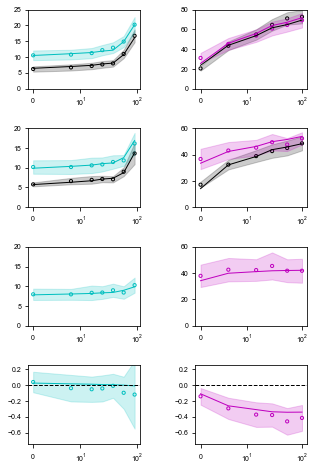

In [75]:

rows=4
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()



for idx_species in range(2):
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]
    
    sol=ALL_sol[idx_species]
    cost=ALL_cost[idx_species]
    idx_best=np.argmin(cost)
    best_param=sol[idx_best,:]
    best_cost=cost[idx_best]
    best_inputs=fun.fit_inputs_to_data_given_param(dataset,Predictor_data,best_param,nCon)
    
    Predictions=Predictor_data(best_inputs,best_param,nCon)
    print(['Mice','Monkeys'][idx_species],best_cost)
    print(repr(best_param))
    print(repr(best_inputs))        
    for idx_moment in range(6):
        if idx_moment<2:
            idx_row=0
            ccc=['k',colors[idx_species]][idx_moment]
            ymin=0
            ymax=[25,80][idx_species]
            
        if (idx_moment>=2)&(idx_moment<4):
            idx_row=1
            ccc=['k',colors[idx_species]][idx_moment-2]
            ymin=0
            ymax=[20,60][idx_species]
         
        if (idx_moment==4):
            idx_row=2
            ccc=colors[idx_species]
            ymin=0
            ymax=[20,60][idx_species]
         
        if (idx_moment==5):
            idx_row=3
            ccc=colors[idx_species]
            ymin=-0.75
            ymax=0.25
                     
        m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
        axs[2*idx_row+idx_species].scatter(Con,m,
                                           facecolors='none', s=10,edgecolors=ccc,marker='o'
                                           )
        axs[2*idx_row+idx_species].fill_between(Con,m-sem,m+sem,
                                                 color=ccc,alpha=0.2)
    
        axs[2*idx_row+idx_species].plot(Con,Predictions[idx_moment,:],
                                        color=ccc,alpha=1.)

        axs[2*idx_row+idx_species].set_xscale('symlog', linthreshx=12)
        axs[2*idx_row+idx_species].set_ylim([ymin,ymax])
    axs[2*idx_row+idx_species].axhline(y=0,ls='--',c='k')

# Combined

In [76]:
DATA_both_species=[dataset_both_species,Con_both_species,nCon_both_species,normalization_both_species]
CMB_sol,CMB_cost=fun.fit_model_to_data_both_species(DATA_both_species,Predictor_data,nCon,nRep,param_min,param_max)


rep= 0  param init= [ 8.95  2.83 -0.41 -1.49 -0.48 -3.43]
[ 8.56  4.36 -0.22 -1.62  0.41 -3.67] 30.631889093533232
rep= 1  param init= [ 5.12  3.6  -0.03 -1.49 -0.49 -3.85]
[ 6.73  3.74 -0.27 -1.6   0.09 -3.66] 36.3267860854874
rep= 2  param init= [ 3.29  2.22 -0.64 -1.49  0.3  -4.38]
[ 3.29  2.27 -0.64 -1.47  0.32 -4.36] 338.37805693267967
rep= 3  param init= [ 7.64  4.53 -0.38 -1.49  0.77 -3.43]
[ 7.67  4.66 -0.32 -1.53  0.62 -3.51] 474.1074337866331
rep= 4  param init= [ 6.49  5.95 -0.83 -1.49 -0.13 -4.34]
[ 7.    6.11 -0.64 -2.06  0.15 -4.07] 27.190846562284253
rep= 5  param init= [ 3.14  2.57 -0.14 -1.49 -0.01 -3.82]
[ 3.5   2.18 -0.21 -1.41  0.19 -3.48] 53.20821404247047
rep= 6  param init= [ 5.51  3.61 -0.39 -1.49 -0.89 -3.65]
[ 5.53  3.63 -0.43 -1.51 -0.83 -3.57] 141.1366328695547
rep= 7  param init= [ 7.06  2.12 -0.52 -1.49 -0.66 -4.73]
[ 7.28  2.26 -0.51 -1.32 -0.6  -4.87] 519.6967646275743
rep= 8  param init= [ 3.3   2.16 -0.69 -1.49 -0.39 -4.21]
[ 4.2   3.24 -0.75 -1.82  0.

[ 6.59  5.5  -0.59 -1.92  0.24 -3.96] 22.031365942827414
rep= 71  param init= [ 9.5   7.58 -0.18 -1.49  0.99 -4.99]
[ 9.46  9.48 -0.19 -1.36  0.88 -4.89] 91.85631982099768
rep= 72  param init= [ 4.68  3.26 -0.43 -1.49  0.42 -3.87]
[ 4.4   3.47 -0.71 -1.81  0.41 -3.85] 22.6632637082327
rep= 73  param init= [ 9.35  8.11 -0.92 -1.49 -0.51 -4.06]
[ 9.35  8.11 -0.92 -1.49 -0.51 -4.06] 2.87220073926378e+22
rep= 74  param init= [ 6.49  5.48 -0.78 -1.49  0.48 -3.94]
[ 6.42  5.57 -0.78 -1.5   0.45 -3.96] 578.6432528699294
rep= 75  param init= [ 9.44  3.04 -0.08 -1.49 -0.43 -3.51]
[ 8.26  2.07 -0.25 -1.41 -0.11 -3.64] 43.06868870119984
rep= 76  param init= [ 9.28  6.47 -0.1  -1.49  0.72 -3.04]
[ 9.28  6.47 -0.1  -1.49  0.72 -3.04] 2.87220073926378e+22
rep= 77  param init= [ 5.37  3.97 -0.83 -1.49 -0.07 -3.93]
[ 5.54  4.15 -0.76 -1.81  0.16 -3.99] 22.82452631671859
rep= 78  param init= [ 3.42  2.65 -0.89 -1.49 -0.66 -4.43]
[ 3.42  2.65 -0.89 -1.49 -0.66 -4.43] 1.8214639418395992e+19
rep= 79  para

Mice 21.005435755279066
array([ 4.2 ,  3.24, -0.75, -1.82,  0.23, -3.84])
array([1.13, 1.15, 1.16, 1.18, 1.18, 1.24, 1.37, 0.28])
Monkeys 21.005435755279066
array([ 4.2 ,  3.24, -0.75, -1.82,  0.23, -3.84])
array([1.49, 1.7 , 1.78, 1.86, 1.87, 1.89, 0.74])


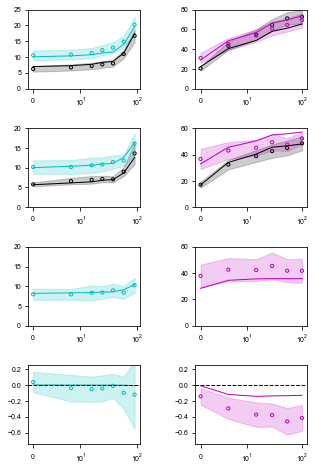

In [77]:

rows=4
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()



for idx_species in range(2):
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]
    normalization=normalization_both_species[idx_species] 

    idx_best=np.argsort(CMB_cost)[0]
    best_param=CMB_sol[idx_best,:]
    best_cost=CMB_cost[idx_best]
    best_inputs=fun.fit_inputs_to_data_given_param(dataset,Predictor_data,best_param,nCon)

    
    Predictions=Predictor_data(best_inputs,best_param,nCon)
    print(['Mice','Monkeys'][idx_species],best_cost)
    print(repr(best_param))
    print(repr(best_inputs))        
    for idx_moment in range(6):
        if idx_moment<2:
            idx_row=0
            ccc=['k',colors[idx_species]][idx_moment]
            ymin=0
            ymax=[25,80][idx_species]
            
        if (idx_moment>=2)&(idx_moment<4):
            idx_row=1
            ccc=['k',colors[idx_species]][idx_moment-2]
            ymin=0
            ymax=[20,60][idx_species]
         
        if (idx_moment==4):
            idx_row=2
            ccc=colors[idx_species]
            ymin=0
            ymax=[20,60][idx_species]
         
        if (idx_moment==5):
            idx_row=3
            ccc=colors[idx_species]
            ymin=-0.75
            ymax=0.25
                     
        m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
        axs[2*idx_row+idx_species].scatter(Con,m,
                                           facecolors='none', s=10,edgecolors=ccc,marker='o'
                                           )
        axs[2*idx_row+idx_species].fill_between(Con,m-sem,m+sem,
                                                 color=ccc,alpha=0.2)
    
        axs[2*idx_row+idx_species].plot(Con,Predictions[idx_moment,:],
                                        color=ccc,alpha=1.)

        axs[2*idx_row+idx_species].set_xscale('symlog', linthreshx=12)
        axs[2*idx_row+idx_species].set_ylim([ymin,ymax])
    axs[2*idx_row+idx_species].axhline(y=0,ls='--',c='k')

In [78]:
10**1.7

50.11872336272722

# Create data array

In [79]:
Tmax_over_tau_E=2*10**2
n_rep=20;

sigma_t=0.01; 
tau_rp=0.002; 


In [80]:
n_repxn

20

In [81]:
count=0;
for idx_rep in range(n_rep):
    for idx_combined in range(2):
        for idx_species in range(2):
            dataset=dataset_both_species[idx_species]
            Con=Con_both_species[idx_species]
            nCon=nCon_both_species[idx_species]
            normalization=normalization_both_species[idx_species] 
            if idx_combined==0:
                # best fit combined
                sol=ALL_sol[idx_species]
                cost=ALL_cost[idx_species]
                idx_best=np.argmin(cost)
                best_param=sol[idx_best,:]
            if idx_combined==1:
                # best fit in mice or monkeys
                idx_best=np.argmin(CMB_cost)
                best_param=CMB_sol[idx_best,:]
                best_cost=CMB_cost[idx_best]


            best_inputs=fun.fit_inputs_to_data_given_param(dataset,Predictor_data,best_param,nCon)

            print(best_param,best_inputs)

            Possible_r_X=10**best_inputs[0:-1]
            ell=10**best_inputs[-1]

            g_E= best_param[0]; g_I=best_param[1];beta=10**best_param[2]; 
            K=500; 
            CV_K=10**best_param[3]
            sigma_Lambda_over_Lambda=10**best_param[4];
            J=10**best_param[5];
            for idx_r_X in range(len(Possible_r_X)):
                r_X=Possible_r_X[idx_r_X];

                data=np.ones((1,14));
                data[:,0]=J
                data[:,1]=r_X
                data[:,2]=sigma_Lambda_over_Lambda
                data[:,3]=Tmax_over_tau_E
                data[:,4]=sigma_t
                data[:,5]=tau_rp
                data[:,6]=g_E 
                data[:,7]=g_I
                data[:,8]=beta
                data[:,9]=K
                data[:,10]=ell
                data[:,11]=CV_K
                data[:,12]=idx_species
                data[:,13]=idx_combined

                if count==0:
                    DATA=data;
                if count>0:
                    DATA=np.vstack((DATA,data));
                count=count+1

len(DATA)



[ 9.97  8.4  -0.48 -1.7  -0.1  -3.88] [0.86 0.89 0.91 0.94 0.95 1.02 1.14 0.62]
[ 4.58  2.73 -0.09 -2.14  0.82 -3.35] [1.16 1.48 1.57 1.63 1.65 1.68 0.4 ]
[ 4.2   3.24 -0.75 -1.82  0.23 -3.84] [1.13 1.15 1.16 1.18 1.18 1.24 1.37 0.28]
[ 4.2   3.24 -0.75 -1.82  0.23 -3.84] [1.49 1.7  1.78 1.86 1.87 1.89 0.74]
[ 9.97  8.4  -0.48 -1.7  -0.1  -3.88] [0.86 0.89 0.91 0.94 0.95 1.02 1.14 0.62]
[ 4.58  2.73 -0.09 -2.14  0.82 -3.35] [1.16 1.48 1.57 1.63 1.65 1.68 0.4 ]
[ 4.2   3.24 -0.75 -1.82  0.23 -3.84] [1.13 1.15 1.16 1.18 1.18 1.24 1.37 0.28]
[ 4.2   3.24 -0.75 -1.82  0.23 -3.84] [1.49 1.7  1.78 1.86 1.87 1.89 0.74]
[ 9.97  8.4  -0.48 -1.7  -0.1  -3.88] [0.86 0.89 0.91 0.94 0.95 1.02 1.14 0.62]
[ 4.58  2.73 -0.09 -2.14  0.82 -3.35] [1.16 1.48 1.57 1.63 1.65 1.68 0.4 ]
[ 4.2   3.24 -0.75 -1.82  0.23 -3.84] [1.13 1.15 1.16 1.18 1.18 1.24 1.37 0.28]
[ 4.2   3.24 -0.75 -1.82  0.23 -3.84] [1.49 1.7  1.78 1.86 1.87 1.89 0.74]
[ 9.97  8.4  -0.48 -1.7  -0.1  -3.88] [0.86 0.89 0.91 0.94 0.95 1.02 1

520

In [82]:
df = pd.DataFrame(DATA,columns=['J','r_X','sigma_Lambda_over_Lambda','Tmax_over_tau_E','sigma_t','tau_rp',
                                'g_E','g_I','beta','K','ell','CV_K','idx_species','idx_combined'])
file_name='simulation_param.txt'
df.to_csv(file_name, sep='\t')


In [83]:
np.shape(DATA)

(520, 14)

# simulation parameters to explore best fits combined

In [66]:
count=0;
for idx_rep in range(n_rep):
    for idx_combined in range(10):
        for idx_species in range(2):
            dataset=dataset_both_species[idx_species]
            Con=Con_both_species[idx_species]
            nCon=nCon_both_species[idx_species]
            normalization=normalization_both_species[idx_species] 

            idx_best=np.argsort(CMB_cost)[idx_combined]
            best_param=CMB_sol[idx_best,:]
            best_cost=CMB_cost[idx_best]
            print(best_cost)



            best_inputs=fun.fit_inputs_to_data_given_param(dataset,Predictor_data,best_param,nCon)

            print(best_param,best_inputs)

            Possible_r_X=10**best_inputs[0:-1]
            ell=10**best_inputs[-1]

            g_E= best_param[0]; g_I=best_param[1];beta=10**best_param[2]; 
            K=500; 
            CV_K=10**best_param[3]
            sigma_Lambda_over_Lambda=10**best_param[4];
            J=10**best_param[5];
            for idx_r_X in range(len(Possible_r_X)):
                r_X=Possible_r_X[idx_r_X];

                data=np.ones((1,14));
                data[:,0]=J
                data[:,1]=r_X
                data[:,2]=sigma_Lambda_over_Lambda
                data[:,3]=Tmax_over_tau_E
                data[:,4]=sigma_t
                data[:,5]=tau_rp
                data[:,6]=g_E 
                data[:,7]=g_I
                data[:,8]=beta
                data[:,9]=K
                data[:,10]=ell
                data[:,11]=CV_K
                data[:,12]=idx_species
                data[:,13]=idx_combined

                if count==0:
                    DATA=data;
                if count>0:
                    DATA=np.vstack((DATA,data));
                count=count+1

len(DATA)



17.910589275978992
[ 4.26  3.1  -0.94 -2.    0.32 -3.89] [1.1  1.15 1.19 1.23 1.24 1.31 1.43 0.18]
17.910589275978992
[ 4.26  3.1  -0.94 -2.    0.32 -3.89] [1.52 1.77 1.84 1.89 1.91 1.93 0.68]
18.046501328853296
[ 4.25  3.21 -0.92 -2.02  0.29 -3.93] [1.12 1.16 1.2  1.25 1.25 1.33 1.46 0.21]
18.046501328853296
[ 4.25  3.21 -0.92 -2.02  0.29 -3.93] [1.56 1.79 1.86 1.91 1.93 1.95 0.7 ]
18.06330644586643
[ 4.34  3.31 -0.91 -2.02  0.27 -3.94] [1.11 1.16 1.2  1.25 1.25 1.33 1.46 0.23]
18.06330644586643
[ 4.34  3.31 -0.91 -2.02  0.27 -3.94] [1.56 1.79 1.86 1.91 1.93 1.95 0.71]
18.10587536805091
[ 4.58  3.55 -0.89 -2.03  0.21 -3.94] [1.1  1.15 1.19 1.24 1.25 1.32 1.46 0.3 ]
18.10587536805091
[ 4.58  3.55 -0.89 -2.03  0.21 -3.94] [1.55 1.78 1.85 1.91 1.92 1.94 0.76]
18.106772316807387
[ 4.56  3.56 -0.88 -2.03  0.23 -3.94] [1.11 1.16 1.2  1.24 1.25 1.32 1.45 0.28]
18.106772316807387
[ 4.56  3.56 -0.88 -2.03  0.23 -3.94] [1.55 1.78 1.85 1.9  1.92 1.94 0.75]
18.10785343386265
[ 4.38  3.37 -0.9  -2

[ 4.58  3.55 -0.89 -2.03  0.21 -3.94] [1.1  1.15 1.19 1.24 1.25 1.32 1.46 0.3 ]
18.10587536805091
[ 4.58  3.55 -0.89 -2.03  0.21 -3.94] [1.55 1.78 1.85 1.91 1.92 1.94 0.76]
18.106772316807387
[ 4.56  3.56 -0.88 -2.03  0.23 -3.94] [1.11 1.16 1.2  1.24 1.25 1.32 1.45 0.28]
18.106772316807387
[ 4.56  3.56 -0.88 -2.03  0.23 -3.94] [1.55 1.78 1.85 1.9  1.92 1.94 0.75]
18.10785343386265
[ 4.38  3.37 -0.9  -2.02  0.28 -3.93] [1.11 1.16 1.21 1.24 1.25 1.33 1.46 0.22]
18.10785343386265
[ 4.38  3.37 -0.9  -2.02  0.28 -3.93] [1.55 1.79 1.86 1.91 1.93 1.95 0.7 ]
18.245160926254357
[ 4.53  3.54 -0.87 -2.01  0.24 -3.92] [1.11 1.17 1.21 1.24 1.25 1.31 1.44 0.26]
18.245160926254357
[ 4.53  3.54 -0.87 -2.01  0.24 -3.92] [1.54 1.77 1.84 1.9  1.92 1.93 0.74]
18.447573997028055
[ 4.18  3.25 -0.86 -1.97  0.28 -3.88] [1.16 1.21 1.23 1.24 1.25 1.31 1.44 0.22]
18.447573997028055
[ 4.18  3.25 -0.86 -1.97  0.28 -3.88] [1.54 1.77 1.84 1.9  1.91 1.93 0.71]
18.467419070476545
[ 4.37  3.42 -0.84 -1.98  0.25 -3.89] 

[ 4.18  3.25 -0.86 -1.97  0.28 -3.88] [1.54 1.77 1.84 1.9  1.91 1.93 0.71]
18.467419070476545
[ 4.37  3.42 -0.84 -1.98  0.25 -3.89] [1.15 1.21 1.22 1.23 1.24 1.3  1.43 0.25]
18.467419070476545
[ 4.37  3.42 -0.84 -1.98  0.25 -3.89] [1.53 1.76 1.84 1.89 1.91 1.93 0.73]
18.480144920632235
[ 4.31  3.4  -0.82 -1.96  0.27 -3.87] [1.17 1.2  1.21 1.23 1.24 1.29 1.42 0.23]
18.480144920632235
[ 4.31  3.4  -0.82 -1.96  0.27 -3.87] [1.52 1.75 1.83 1.88 1.9  1.92 0.72]
17.910589275978992
[ 4.26  3.1  -0.94 -2.    0.32 -3.89] [1.1  1.15 1.19 1.23 1.24 1.31 1.43 0.18]
17.910589275978992
[ 4.26  3.1  -0.94 -2.    0.32 -3.89] [1.52 1.77 1.84 1.89 1.91 1.93 0.68]
18.046501328853296
[ 4.25  3.21 -0.92 -2.02  0.29 -3.93] [1.12 1.16 1.2  1.25 1.25 1.33 1.46 0.21]
18.046501328853296
[ 4.25  3.21 -0.92 -2.02  0.29 -3.93] [1.56 1.79 1.86 1.91 1.93 1.95 0.7 ]
18.06330644586643
[ 4.34  3.31 -0.91 -2.02  0.27 -3.94] [1.11 1.16 1.2  1.25 1.25 1.33 1.46 0.23]
18.06330644586643
[ 4.34  3.31 -0.91 -2.02  0.27 -3.94]

[ 4.26  3.1  -0.94 -2.    0.32 -3.89] [1.52 1.77 1.84 1.89 1.91 1.93 0.68]
18.046501328853296
[ 4.25  3.21 -0.92 -2.02  0.29 -3.93] [1.12 1.16 1.2  1.25 1.25 1.33 1.46 0.21]
18.046501328853296
[ 4.25  3.21 -0.92 -2.02  0.29 -3.93] [1.56 1.79 1.86 1.91 1.93 1.95 0.7 ]
18.06330644586643
[ 4.34  3.31 -0.91 -2.02  0.27 -3.94] [1.11 1.16 1.2  1.25 1.25 1.33 1.46 0.23]
18.06330644586643
[ 4.34  3.31 -0.91 -2.02  0.27 -3.94] [1.56 1.79 1.86 1.91 1.93 1.95 0.71]
18.10587536805091
[ 4.58  3.55 -0.89 -2.03  0.21 -3.94] [1.1  1.15 1.19 1.24 1.25 1.32 1.46 0.3 ]
18.10587536805091
[ 4.58  3.55 -0.89 -2.03  0.21 -3.94] [1.55 1.78 1.85 1.91 1.92 1.94 0.76]
18.106772316807387
[ 4.56  3.56 -0.88 -2.03  0.23 -3.94] [1.11 1.16 1.2  1.24 1.25 1.32 1.45 0.28]
18.106772316807387
[ 4.56  3.56 -0.88 -2.03  0.23 -3.94] [1.55 1.78 1.85 1.9  1.92 1.94 0.75]
18.10785343386265
[ 4.38  3.37 -0.9  -2.02  0.28 -3.93] [1.11 1.16 1.21 1.24 1.25 1.33 1.46 0.22]
18.10785343386265
[ 4.38  3.37 -0.9  -2.02  0.28 -3.93] [1.

[ 4.58  3.55 -0.89 -2.03  0.21 -3.94] [1.55 1.78 1.85 1.91 1.92 1.94 0.76]
18.106772316807387
[ 4.56  3.56 -0.88 -2.03  0.23 -3.94] [1.11 1.16 1.2  1.24 1.25 1.32 1.45 0.28]
18.106772316807387
[ 4.56  3.56 -0.88 -2.03  0.23 -3.94] [1.55 1.78 1.85 1.9  1.92 1.94 0.75]
18.10785343386265
[ 4.38  3.37 -0.9  -2.02  0.28 -3.93] [1.11 1.16 1.21 1.24 1.25 1.33 1.46 0.22]
18.10785343386265
[ 4.38  3.37 -0.9  -2.02  0.28 -3.93] [1.55 1.79 1.86 1.91 1.93 1.95 0.7 ]
18.245160926254357
[ 4.53  3.54 -0.87 -2.01  0.24 -3.92] [1.11 1.17 1.21 1.24 1.25 1.31 1.44 0.26]
18.245160926254357
[ 4.53  3.54 -0.87 -2.01  0.24 -3.92] [1.54 1.77 1.84 1.9  1.92 1.93 0.74]
18.447573997028055
[ 4.18  3.25 -0.86 -1.97  0.28 -3.88] [1.16 1.21 1.23 1.24 1.25 1.31 1.44 0.22]
18.447573997028055
[ 4.18  3.25 -0.86 -1.97  0.28 -3.88] [1.54 1.77 1.84 1.9  1.91 1.93 0.71]
18.467419070476545
[ 4.37  3.42 -0.84 -1.98  0.25 -3.89] [1.15 1.21 1.22 1.23 1.24 1.3  1.43 0.25]
18.467419070476545
[ 4.37  3.42 -0.84 -1.98  0.25 -3.89]

2600

In [67]:
df = pd.DataFrame(DATA,columns=['J','r_X','sigma_Lambda_over_Lambda','Tmax_over_tau_E','sigma_t','tau_rp',
                                'g_E','g_I','beta','K','ell','CV_K','idx_species','idx_combined'])
file_name='simulation_param.txt'
df.to_csv(file_name, sep='\t')


In [68]:
len(DATA)

2600

# Test here simulation results

In [53]:
idx_species=1;
dataset=dataset_both_species[idx_species]
Con=Con_both_species[idx_species]
nCon=nCon_both_species[idx_species]
normalization=normalization_both_species[idx_species] 

sol=ALL_sol[idx_species]
cost=ALL_cost[idx_species]
idx_best=np.argmin(cost)
best_param=sol[idx_best,:]
best_cost=cost[idx_best]
best_inputs=fun.fit_inputs_to_data_given_param(dataset,Predictor_data,best_param,nCon)

print(best_param)

[ 8.18  6.07  0.15 -2.06  0.47 -3.4 ]


In [38]:
sigma_t=0.01; # Input noise, determine how smooth the single neuron transfer function is 
tau_rp=0.002; # Refractory period

g_E= best_param[0]; g_I=best_param[1];beta=10**best_param[2]; # parameters characterizing the relative strength of synaptic connections
K=500; # average number of E connections per neuron (I connections are 1/4 of that)

CV_K=10**best_param[3]
sigma_Lambda_over_Lambda=10**best_param[4]; # ratio between mean and standard deviation of the opsin expression

J=10**best_param[5]; # Synaptic efficacy in Volts
r_X=10**np.asarray(best_inputs[0:-1])
#r_X=10**np.asarray([1.62])
L=[0.,  10.**(best_inputs[-1])]; #  Laser intensity that fits the data

#Tmax_over_tau_E=20;
Tmax_over_tau_E=200;

p=0.1; # probability of connection between cells. 
sigma_X_over_r_X=0.2; # Presynaptic population has mean rate r_X, Gaussianly distributed with std=0.2* r_X
Lambda=1*10**-3; # mean opsin expression in Volt

sigma_Lambda=sigma_Lambda_over_Lambda*Lambda

# In what follows, I compute W_{AB} starting from the parameters defined above
G_E,G_I=1.0,2.0 # Gain of Excitatory and inhibitory cells and I cells
w_EE=1;w_IE=w_EE/beta;
w_EI=g_E*w_EE;w_II=g_I*w_IE;
w_EX,w_IX=(G_I*fun_dyna.gamma*g_E-G_E)*w_EE,(G_I*fun_dyna.gamma*g_I-G_E)*w_IE; 
w_X=np.asarray([w_EX,w_IX]);
w=np.zeros((2,2));
w[0,:]=w_EE,-w_EI
w[1,:]=w_IE,-w_II



In [39]:
M,mu_X_over_r_X_tau,Lambda_i,N_E,N_I=fun_dyna.Generate_quenched_disorder(CV_K,J,K,w,w_X,p,Lambda,sigma_Lambda)

In [26]:
'''
mu_tab_max=10.0;
mu_tab=np.linspace(-mu_tab_max,mu_tab_max,200000)
mu_tab=np.concatenate(([-10000],mu_tab))
mu_tab=np.concatenate((mu_tab,[10000]))

phi_tab_E,phi_tab_I=mu_tab*0,mu_tab*0;
for idx in range(len(phi_tab_E)):
    phi_tab_E[idx]=fun_dyna.comp_phi_tab(mu_tab[idx],fun_dyna.tau_E,tau_rp,sigma_t)
    phi_tab_I[idx]=fun_dyna.comp_phi_tab(mu_tab[idx],fun_dyna.tau_I,tau_rp,sigma_t)

phi_int_E=interp1d(mu_tab, phi_tab_E, kind='linear')  
phi_int_I=interp1d(mu_tab, phi_tab_I, kind='linear')
'''


In [40]:
T=np.arange(0,Tmax_over_tau_E*fun_dyna.tau_E,fun_dyna.tau_I/3);
mask_time=T>(10*fun_dyna.tau_E)
RATES=-1*np.ones((len(r_X),len(L),N_E+N_I))
DYNA=-1*np.ones((len(r_X),len(L),N_E+N_I,len(T)))
MUS=-1*np.ones((len(r_X),len(L),N_E+N_I))
Lambda_i_L=1./tau_rp*np.ones((len(r_X),len(L),N_E+N_I))

print('Computing and saving network response')
for idx_r_X in range(len(r_X)):
    for idx_L in range(len(L)):
        r_X_local,L_local=r_X[idx_r_X],L[idx_L];
        print((idx_r_X+1)/len(r_X),(idx_L+1)/len(L))
        DYNA[idx_r_X,idx_L,:,:], MUS[idx_r_X,idx_L,:],Lambda_i_L[idx_r_X,idx_L,:]=fun_dyna.High_dimensional_dynamics(T,L_local,r_X_local,M,mu_X_over_r_X_tau,Lambda_i,N_E,N_I,phi_int_E,phi_int_I);
        RATES[idx_r_X,idx_L,:]=np.mean(DYNA[idx_r_X,idx_L,:,mask_time],axis=0)
        print(np.mean(RATES[idx_r_X,idx_L,0:N_E]),
              np.mean(RATES[idx_r_X,idx_L,N_E::]),
              np.std(RATES[idx_r_X,idx_L,0:N_E]),
              np.std(RATES[idx_r_X,idx_L,N_E::]))




Computing and saving network response
0.16666666666666666 0.5
24.478001179808455 22.9855832144751 12.913696996036178 5.387225025600989
0.16666666666666666 1.0
28.66617198810581 25.58380920224645 32.188882852461646 12.469538473238815
0.3333333333333333 0.5
42.14254180039036 43.610877593153695 26.458993929656963 15.625002415623282
0.3333333333333333 1.0
45.529383543959135 45.66836283435949 46.11677318215018 25.72099000017685
0.5 0.5
51.440325665991125 54.999559668130395 32.0828739298009 20.4077539303157
0.5 1.0
54.21254730581688 56.67115169451306 48.33793950094926 28.95458090273212
0.6666666666666666 0.5
59.42454598161324 65.06303818432507 37.72518863518845 24.92603155436818
0.6666666666666666 1.0
61.98666958612905 66.60327594394815 52.31105214231051 33.13829689320383
0.8333333333333334 0.5
62.709010350213575 69.26010772827445 40.35261263091565 26.913571124506472
0.8333333333333334 1.0
65.2769368998773 70.7960935932001 54.6301037234171 35.25483078944108
1.0 0.5
66.83981675130228 74.57957

0.53504
0.54688
0.53664
0.5248
0.5224
0.52272


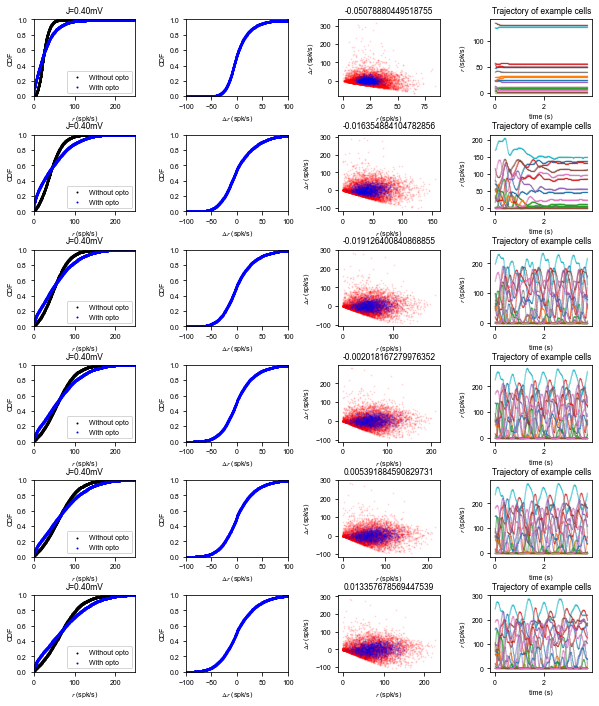

In [42]:
bin_edges=np.arange(0,1./tau_rp,.1)
spacings=np.diff(bin_edges)[0];
bin_means=0.5*(bin_edges[0:-1]+bin_edges[1::])
bin_edges_Delta=np.arange(-1./tau_rp,1./tau_rp,.1)
spacings_Delta=np.diff(bin_edges)[0];
bin_means_Delta=0.5*(bin_edges_Delta[0:-1]+bin_edges_Delta[1::])

fig, axs = plt.subplots(len(r_X),4, figsize=(2.5*4,2.0*len(r_X)), facecolor='w', edgecolor='k')#,sharey='row')#,sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.5)
area=1.0;linethicknes=1.0;
axs = axs.ravel()
font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42

idx_r_X=0
mask_active_cells=(RATES[idx_r_X,1,:]>=0)|(RATES[idx_r_X,0,:]>=0)
for idx_r_X in np.arange(1,len(r_X),1):
    mask_active_cells=mask_active_cells|(RATES[idx_r_X,1,:]>=0)|(RATES[idx_r_X,0,:]>=0)

for idx_r_X in range(len(r_X)):
    

    color=['k','b',];
    label=['Without opto','With opto']
    for idx_L in range(len(L)):
        #hist, bin_edges=np.histogram(RATES[idx_r_X,idx_L,0:N_E],bin_edges)#,normed=True)
        hist, bin_edges=np.histogram(RATES[idx_r_X,idx_L,mask_active_cells],bin_edges)#,normed=True)
        bin_mean=0.5*(bin_edges[0:-1]+bin_edges[1::])
        spacings=np.diff(bin_edges)[0];
        hist=hist/np.sum(hist*spacings)
        axs[idx_r_X*4+0].scatter(bin_mean,np.cumsum(spacings*hist),c=color[idx_L],s=area,label=label[idx_L])

        
    Delta_Sim=RATES[idx_r_X,1,mask_active_cells]-RATES[idx_r_X,0,mask_active_cells]
    print(len(Delta_Sim[Delta_Sim<0])/len(Delta_Sim))
    
    hist_Delta, bin_edges_Delta=np.histogram(Delta_Sim,bin_edges_Delta,normed=True)
    CDF_Resp_Delta=np.cumsum(hist_Delta*spacings_Delta)
    axs[idx_r_X*4+1].scatter(bin_means_Delta,CDF_Resp_Delta,c='b',s=area);


    #axs[idx_r_X*4+2].scatter(RATES[idx_r_X,0,maks_cells],RATES[idx_r_X,1,maks_cells]-RATES[idx_r_X,0,maks_cells],c='b',s=1,alpha=0.3);
    idx_cells=np.where(np.arange(len(Lambda_i))<N_E)
    axs[idx_r_X*4+2].scatter(RATES[idx_r_X,0,idx_cells],RATES[idx_r_X,1,idx_cells]-RATES[idx_r_X,0,idx_cells],c='r',s=1,alpha=0.1);
    idx_cells=np.where(np.arange(len(Lambda_i))>N_E)
    axs[idx_r_X*4+2].scatter(RATES[idx_r_X,0,idx_cells],RATES[idx_r_X,1,idx_cells]-RATES[idx_r_X,0,idx_cells],c='b',s=1,alpha=0.1);

    cov=np.cov(RATES[idx_r_X,0,mask_active_cells],RATES[idx_r_X,1,mask_active_cells]-RATES[idx_r_X,0,mask_active_cells])
    axs[idx_r_X*4+2].set_title(cov[0,1]/cov[1,1])


    for idx_cell in range(17):
        axs[idx_r_X*4+3].plot(T[mask_time]-T[mask_time][0],DYNA[idx_r_X,1,idx_cell,mask_time],marker='o',markersize=0.1,alpha=0.5)

    axs[idx_r_X*4+0].axis([0,250,.0,1.])
    axs[idx_r_X*4+0].legend(loc='lower right')
    axs[idx_r_X*4+1].axis([-100,100,0,1.])
    axs[idx_r_X*4+0].set_title('J=%.2fmV'%(J*10**3))
    axs[idx_r_X*4+0].set_ylabel('CDF')
    axs[idx_r_X*4+1].set_ylabel('CDF')
    axs[idx_r_X*4+0].set_xlabel('$r$ (spk/s)')
    axs[idx_r_X*4+1].set_xlabel('$\Delta r$ (spk/s)')
    axs[idx_r_X*4+2].set_ylabel('$\Delta r$ (spk/s)')
    axs[idx_r_X*4+2].set_xlabel('$r$ (spk/s)')
    axs[idx_r_X*4+3].set_ylabel('$r$ (spk/s)')
    axs[idx_r_X*4+3].set_xlabel('time (s)')
    axs[idx_r_X*4+3].set_title('Trajectory of example cells')



In [45]:
moments_of_r_sim=np.zeros((len(r_X),5))
#ATTT
mask_active_cells=(RATES[idx_r_X,1,:]>=0)|(RATES[idx_r_X,0,:]>=0)

'''
idx_r_X=0
mask_active_cells=(RATES[idx_r_X,1,:]>=1)|(RATES[idx_r_X,0,:]>=1)
for idx_r_X in np.arange(1,len(r_X),1):
    mask_active_cells=mask_active_cells|(RATES[idx_r_X,1,:]>=1)|(RATES[idx_r_X,0,:]>=1)
'''
for idx_r_X in range(len(r_X)):
    #mask_active_cells=(RATES[idx_r_X,1,:]>=1)|(RATES[idx_r_X,0,:]>=1)
    Base_Sim=RATES[idx_r_X,0,:][mask_active_cells]
    Delta_Sim=(RATES[idx_r_X,-1,:]-RATES[idx_r_X,0,:])[mask_active_cells]
    
    moments_of_r_sim[idx_r_X,0]=np.mean(Base_Sim)
    moments_of_r_sim[idx_r_X,1]=np.mean(Delta_Sim)
    moments_of_r_sim[idx_r_X,2]=np.std(Base_Sim)
    moments_of_r_sim[idx_r_X,3]=np.std(Delta_Sim)
    pippo=np.cov(Base_Sim,Delta_Sim)
    moments_of_r_sim[idx_r_X,4]=(pippo)[0,1]/(pippo)[1,1]


IndexError: index 4 is out of bounds for axis 0 with size 4

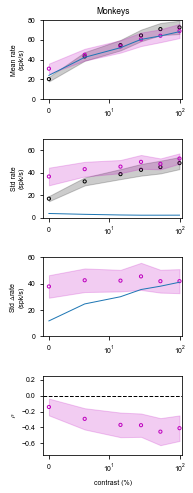

In [56]:

rows=4
cols=1

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()





for idx_moment in range(6):
    if idx_moment<2:
        idx_row=0
        ccc=['k',colors[idx_species]][idx_moment]
        ymin=0
        ymax=[25,80][idx_species]

    if (idx_moment>=2)&(idx_moment<4):
        idx_row=1
        ccc=['k',colors[idx_species]][idx_moment-2]
        ymin=0
        #ymax=[20,60][idx_species]
        ymax=[20,70][idx_species]

    if (idx_moment==4):
        idx_row=2
        ccc=colors[idx_species]
        ymin=0
        ymax=[20,60][idx_species]

    if (idx_moment==5):
        idx_row=3
        ccc=colors[idx_species]
        ymin=-0.75
        ymax=0.25

    m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
    axs[cols*idx_row].scatter(Con,m,
                                       facecolors='none', s=10,edgecolors=ccc,marker='o'
                                       )
    axs[cols*idx_row].fill_between(Con,m-sem,m+sem,
                                             color=ccc,alpha=0.2)

    axs[cols*idx_row].set_xscale('symlog', linthreshx=12)
    axs[cols*idx_row].axis([-1.,110,ymin,ymax])
axs[cols*idx_row].axhline(y=0,ls='--',c='k')
axs[cols*3].set_xlabel('contrast (%)')
axs[cols*0].set_title(['Mice','Monkeys'][idx_species])
axs[cols*0].set_ylabel('Mean rate\n(spk/s)')
axs[cols*1].set_ylabel('Std rate\n(spk/s)')
axs[cols*2].set_ylabel('Std $\Delta$rate\n(spk/s)')
axs[cols*3].set_ylabel(r'$\rho$')
'''
        
for idx_species in [0,1]:
    print(idx_species)
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]

    mask_cases=(sim_species==idx_species)&(sim_combined==idx_combined)

    data_x=sim_param_all[mask_cases,12]
    cost=0
    for idx_moment in range(6):
        clr=color[idx_species]

        if idx_moment==0:
            data_y=moments_of_r_sim_all[mask_cases,0]
            idx_plot=2*0+idx_species
            clr='k'
        if idx_moment==1:
            data_y=moments_of_r_sim_all[mask_cases,0]+moments_of_r_sim_all[mask_cases,1]
            idx_plot=2*0+idx_species
        if idx_moment==2:
            data_y=moments_of_r_sim_all[mask_cases,2]
            idx_plot=2*1+idx_species
            clr='k'
        if idx_moment==3:
            data_y=np.sqrt(moments_of_r_sim_all[mask_cases,2]**2
                           +moments_of_r_sim_all[mask_cases,3]**2
                           +2*moments_of_r_sim_all[mask_cases,4])
            idx_plot=2*1+idx_species
        if idx_moment==4:
            data_y=moments_of_r_sim_all[mask_cases,3]
            idx_plot=2*2+idx_species

        if idx_moment==5:
            data_y=moments_of_r_sim_all[mask_cases,4]/moments_of_r_sim_all[mask_cases,3]**2
            idx_plot=2*3+idx_species


        data_y_med=np.zeros((len(np.unique(data_x)),3))
        for idx in range(len(np.unique(data_x))):
            mask_x=data_x==np.unique(data_x)[idx]
            data_y_med[idx,0]=np.mean(data_y[mask_x])
            data_y_med[idx,1]=stats.sem(data_y[mask_x])
        axs[idx_plot].errorbar(Con,data_y_med[:,0],data_y_med[:,1],c=clr,ls=ls) 
        cost_moment=(data_y_med[:,0]-dataset[idx_moment,:,0])/dataset[idx_moment,:,1]
        cost_moment=(0.5*(np.sum(cost_moment**2)))
        cost=cost+cost_moment
        print(cost_moment,cost)
    print('   ',cost)
'''

Prediction=Predictor_data(best_inputs,best_param,nCon,)
for idx_moment in range(5):
    idx_plt=idx_moment
    axs[idx_plt].plot(Con,moments_of_r_sim[:,idx_moment],label='data')



'\naxs[0].set_ylim([0,20])\naxs[1].set_ylim([0,10])\naxs[2].set_ylim([0,20])\naxs[3].set_ylim([0,20])\naxs[4].set_ylim([-10,0])\n'

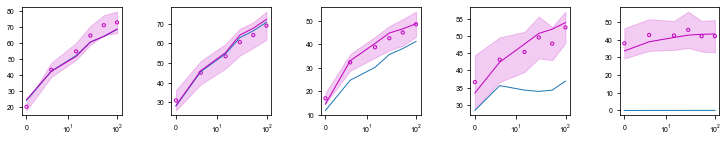

In [44]:
rows=1
cols=5
colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()


Prediction=Predictor_data(best_inputs,best_param,nCon,)
for idx_moment in range(5):
    idx_plt=idx_moment
    axs[idx_plt].plot(Con,moments_of_r_sim[:,idx_moment],label='data')


    m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
    axs[idx_plt].scatter(Con,m,facecolors='none', s=10,edgecolors=ccc,marker='o')
    axs[idx_plt].fill_between(Con,m-sem,m+sem,color=ccc,alpha=0.2)

    axs[idx_plt].plot(Con,Predictions[idx_moment,:],color=ccc,alpha=1.)
    axs[idx_plt].set_xscale('symlog', linthreshx=12)
'''
axs[0].set_ylim([0,20])
axs[1].set_ylim([0,10])
axs[2].set_ylim([0,20])
axs[3].set_ylim([0,20])
axs[4].set_ylim([-10,0])
'''

In [32]:
np.shape(Prediction)

(6, 6)